<h1><b>SBAS:</b>TME SOLO 2025</h1><br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Instructions**</p>
<ul>
<li>Open JupyterLite in your browser — your TME files should already be there.
<li>Access Moodle and download the exam notebook.
<li>Upload the downloaded notebook into JupyterLite.
<li>Complete the exercise directly in the notebook.
<li>Periodically save your work.
<li>Save add download your completed notebook.
<li>Rename the file as surname_TMEsolo2025.ipynb 
<li>Upload your final notebook as an assignment on Moodle.
</ul>

<p>**JupyterLite**</p>
<ul>
<li>To upload a file: drag it from your computer into the file browser on the left side of the JupyterLite interface.
<li>To download a file: right-click on the notebook name and select “Download” to save it to your computer.
<ul>



</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Disclaimer**</p>
All datasets used in this exercise are artificially generated. They have been designed solely for the purpose of evaluating algorithmic performance in a controlled setting. The sequences and annotations are not derived from real biological sources and should not be used for biological inference.

</div>

<div class="alert alert-danger" role="alert" style="margin: 10px">
  <p><b>Exam Rules</b></p>
  <ul>
    <li>Only the <b>JupyterLite window</b> must remain open during the exam — <b>all other windows and tabs must be closed</b>!</li>
    <li>Make sure to <b>rename your notebook file</b> before submitting.</li>
    <li>The notebook must be <b>submitted already compiled</b>.</li>
    <li>You can use only the library already imported in the code.</li>
    <li>For each exercise, you will find rigorous instructions on the format of your answers. Answers using different formats will not be considered.li>
  </ul>
</div>

## EXERCISE 1: Influenza Hemagglutinin Conservation Analysis (11pt)

Influenza hemagglutinin (HA) is a critical glycoprotein that facilitates viral entry into host cells. Despite high mutation rates, certain regions of HA remain conserved due to their functional or structural importance. In this exercise, you will analyze a multiple sequence alignment (MSA) of HA sequences to identify conserved motifs that could be potential vaccine targets.

You have to code the following steps:
1. Parse the FASTA file containing the HA sequences and validate the MSA.
2. Construct a Position Weight Matrix (PWM) from the alignment.
3. Calculate the Shannon entropy for each column to assess conservation, and plot the entropy profile.
4. Compute the similarity between a target sequence and the consensus sequence using the BLOSUM62 matrix.
5. Explain the results and make your conclusion.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

alphabet = "ARNDCQEGHILKMFPSTWYVBZX-"

In [8]:
# ---------------------------
# Step 1: Parse and Validate MSA (1pt)
# ---------------------------

def parse_fasta(filename: str) -> list:
    """
    Reads a FASTA file and returns a list of aligned sequences.
    Raises an error if sequences are not of equal length.
    
    Args:
        filename (str): Path to the FASTA file.
        
    Returns:
        List[str]: List of aligned sequences.
    """

    sequences = []
    with open(filename) as f:
        current_seq = ''
        for line in f:
            if line.startswith('>'):
                if current_seq:
                    sequences.append(current_seq)
                current_seq = ''
            else:
                current_seq += line.strip()
        if current_seq:
            sequences.append(current_seq)
    lengths = [len(seq) for seq in sequences]
    if len(set(lengths)) != 1:
        raise ValueError("MSA is invalid: sequences are not all the same length")

    return sequences


In [9]:
fasta_file = 'HA_alignment.fasta'
sequences = parse_fasta(fasta_file)
L = len(sequences[0])
print(f"Parsed {len(sequences)} sequences, each of length {L}.")

Parsed 74 sequences, each of length 44.


In [10]:
# ---------------------------
# Step 2: Construct the PWM (2pt)
# ---------------------------

def compute_pwm(sequences):

    """
    Computes the Position Weight Matrix (PWM) with pseudo-count from the given MSA.
    
    Args:
        sequences (list): List of aligned sequences.
        
    Returns:
        Array[len_alphabet, len_seq]: A PWM (that has one row for each symbol in the alphabet and 
        one column for each position of the alignment).
    """

def compute_pwm(sequences):
    PWM = np.zeros((len(alphabet), len(sequences[0])))
    for seq in sequences:
        for i, aa in enumerate(seq):
            if aa in alphabet:
                PWM[alphabet.index(aa), i] += 1
    PWM += 1  # pseudo-count
    PWM /= PWM.sum(axis=0)  # normalisation colonne par colonne



    return PWM


In [11]:
pwm = compute_pwm(sequences)
print(pwm)

[[0.01020408 0.01020408 0.08163265 ... 0.01020408 0.01020408 0.01020408]
 [0.01020408 0.01020408 0.01020408 ... 0.01020408 0.01020408 0.01020408]
 [0.01020408 0.01020408 0.01020408 ... 0.01020408 0.01020408 0.01020408]
 ...
 [0.01020408 0.01020408 0.01020408 ... 0.01020408 0.01020408 0.01020408]
 [0.01020408 0.01020408 0.01020408 ... 0.01020408 0.01020408 0.01020408]
 [0.75510204 0.71428571 0.68367347 ... 0.55102041 0.55102041 0.55102041]]


In [12]:
# ---------------------------
# Step 3: Calculate Entropy (2pt)
# ---------------------------


def compute_entropy(pwm: np.array) -> list:
    """
    Compute the entropy for every column in the MSA and plot the entropy profile.
    
    Args:
        Array[len_alphabet, len_sequences]: PWM
        
    Returns:
        List[float]: Entropy value for each column in the MSA.
    """
def compute_entropy(pwm: np.array) -> list:
    entropies = []
    for col in pwm.T:
        entropy = -np.sum(col * np.log2(col + 1e-9))  # +epsilon pour éviter log(0)
        entropies.append(entropy)
    plt.figure(figsize=(10,3))
    plt.plot(entropies)
    plt.title("Shannon Entropy per Position")
    plt.xlabel("Position")
    plt.ylabel("Entropy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



    return entropies


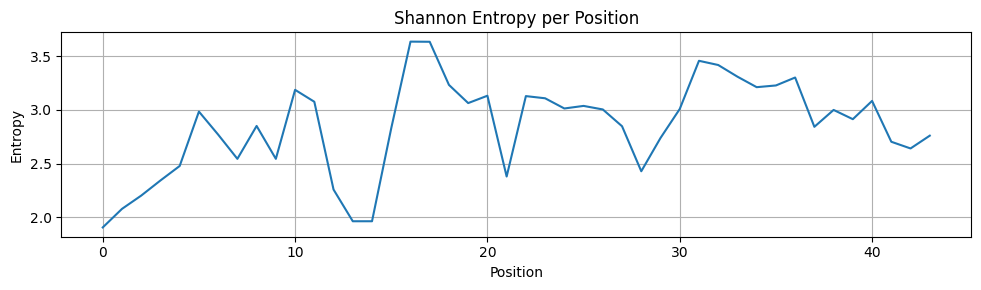

[np.float64(1.9055307374849955), np.float64(2.0783875014244613), np.float64(2.2021794445857257), np.float64(2.3430528402506816), np.float64(2.4780761647465046), np.float64(2.9846758512375837), np.float64(2.770324355120415), np.float64(2.544501023124214), np.float64(2.850929153002321), np.float64(2.544501023124214), np.float64(3.1873377842315516), np.float64(3.0762825853209415), np.float64(2.258281116861366), np.float64(1.9631058013452098), np.float64(1.9631058013452098), np.float64(2.829818530449849), np.float64(3.636482980820453), np.float64(3.6350556335393502), np.float64(3.2333214832708386), np.float64(3.063953019791005), np.float64(3.1324305188503625), np.float64(2.3798445577493155), np.float64(3.1289464332350967), np.float64(3.108641959411415), np.float64(3.0137028969705035), np.float64(3.0376673413133277), np.float64(3.0045607821442726), np.float64(2.8482221597573814), np.float64(2.4288582776312406), np.float64(2.738927759314035), np.float64(3.009034927168208), np.float64(3.45786

In [13]:
entropy_vector = compute_entropy(pwm)
print(entropy_vector)

In [16]:
# ---------------------------
# Step 4: Compute Similarity Between Target Sequence and Consensus Sequence (use BLOSUM62) (3pt)
# ---------------------------

def compute_consensus_sequence(pwm: np.array) -> str:
    """
    Derives the consensus sequence from the PWM by selecting, for each column,
    the amino acid with the highest score (exclude gaps).
    
    Args:
        pwm (array): The Position-Specific Weight Matrix.
        
    Returns:
        str: The consensus sequence.
    """
    
    consensus = ''
    for i in range(pwm.shape[1]):
        col = pwm[:, i]
        col[alphabet.index('-')] = -1  # exclude gaps
        idx = np.argmax(col)
        consensus += alphabet[idx]


    return consensus


def read_blosum_matrix(filename: str) -> dict:
    """
    Reads a BLOSUM matrix from a text file and returns it as a dictionary.
    
    Args:
        filename (str): Path to the BLOSUM matrix file.
        
    Returns:
        dict: A dictionary with keys (aa1, aa2) and value the integer scores.
    """
    
    blosum = {}
    with open(filename) as f:
        lines = [l.strip() for l in f if l.strip() and not l.startswith('#')]
        headers = lines[0].split()
        for line in lines[1:]:
            parts = line.split()
            row_aa = parts[0]
            for col_aa, val in zip(headers, parts[1:]):
                blosum[(row_aa, col_aa)] = int(val)
    return blosum


def compute_similarity_to_consensus(target_sequence: str, consensus_sequence: str, blosum: dict) -> float:
    """
    Calculates the percentage similarity between a target sequence and the consensus sequence.
    A position is considered similar if the BLOSUM62 score between the target and consensus residue is greater than zero.
    
    Args:
        target_sequence (str): The target protein sequence.
        consensus_sequence (str): The consensus sequence.
        blosum (dict): Dictionary representing the BLOSUM62 matrix.
        
    Returns:
        float: The similarity percentage.
    """
    similar = 0
    total = min(len(target_sequence), len(consensus_sequence))
    for a, b in zip(target_sequence, consensus_sequence[:total]):
        score = blosum.get((a, b), blosum.get((b, a), -1))
        if score > 0:
            similar += 1
    similarity = (similar / total) * 100
    
    return similarity

In [15]:
blosum62 = read_blosum_matrix("blosum62.txt")

consensus_sequence = compute_consensus_sequence(pwm)
print("Consensus Sequence derived from PWM:")
print(consensus_sequence)
target_sequence = "VAATGRRNVSEIPKKKASRGLFGAIGGFIENGWKGNEDGFLLFL"
print("Target Sequence:")
print(target_sequence)

similarity_percentage = compute_similarity_to_consensus(target_sequence, consensus_sequence, blosum62)
print(f"Similarity between the target sequence and the consensus sequence: {similarity_percentage:.2f}%")

<class 'FileNotFoundError'>: [Errno 44] No such file or directory: 'blosum62.txt'

# ---------------------------
#### Step 5: Explanation (2pt)
# ---------------------------

#### Explain why is usefull to look at the entropy profile. Which are the most conserved positions?

L'entropie, c'est une façon de mesurer la diversité des acides aminés à chaque position dans notre alignement de séquences. Si une position a une faible entropie, ça veut dire que les mêmes acides aminés apparaissent souvent à cet endroit dans toutes les séquences, donc c'est une position assez conservée. Ces positions sont généralement importantes pour la structure ou la fonction de la protéine, et sont souvent plus sensibles aux mutations.

En gros, en regardant l'entropie, on peut repérer les régions les plus stables et donc les plus importantes dans la protéine. Ces zones conservées sont intéressantes pour des applications comme la création de vaccins, parce qu'elles sont moins susceptibles de changer avec le temps.

____________________________________________________________________________________________________________________________________

# EXERCISE 2: HMM for Protein Domain Prediction (9pt)

## Introduction

Proteins often consist of distinct regions, such as functional domains responsible for the protein's activity and background regions that are less conserved. In this exercise, you will use a Hidden Markov Model (HMM) and the Viterbi algorithm to segment an amino acid sequence into two hidden states:
- **D (Domain):** Regions that are part of a functional domain.
- **B (Background):** Regions outside the functional domain.

The exercise mimics a scenario where researchers want to identify key functional domains in a protein sequence. You will be provided with:
- An observed amino acid sequence.
- The true (labeled) hidden states for each residue.

Your tasks are:
1. Implement the Viterbi algorithm to predict the hidden state sequence for the given amino acid sequence.
2. Compare your predicted labels sequence to the true labels, by computing the metrics below.
3. Answer the questions.

Metrics:
<ul>
<li>Sensibility `TPR = TP/(TP+FN)`</li>
<li>Selectivity `TNR = TN/(TN+FP)` and its complementary `FPR = 1-TNR`</li>
<li>Precision `PPV = TP/(TP+FP)`</li>
<li>F-score `2(PPV*TPR)/(PPV+TPR)`</li>
</ul>


In [43]:
# ---------------------------
#  HMM parameters
# ---------------------------

import numpy as np
import operator

# 1. Alphabet
alphabet = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_idx = {aa: idx for idx, aa in enumerate(alphabet)}

# 2. Initial probabilities
states = ['D', 'B']
pi = np.array([0.4, 0.6]) 

# 3. Transition probabilities
P = np.array([
    [0.55, 0.45],  # D -> D, D -> B
    [0.4, 0.6]   # B -> D, B -> B
])

# 4. Emission probabilities
E = np.array([
    [0.1 if aa in 'ACD' else 0.05 for aa in alphabet],  # Emission from Domain
    [0.05 if aa in 'CHK' else 0.1 for aa in alphabet]   # Emission from Background
])
E = E / E.sum(axis=1, keepdims=True)


In [44]:
# ---------------------------
# Step 1: Viterbi Algorithm (3pt)
# ---------------------------

def viterbi(obs_seq, P, E, pi, aa_to_idx, states):
    """
    Implements the Viterbi algorithm for decoding the most probable sequence of hidden states.
    
    Args:
        obs_seq (str): Observed sequence (amino acid sequence).
        P (np.ndarray): Transition probability matrix (shape: num_states x num_states).
        E (np.ndarray): Emission probability matrix (shape: num_states x alphabet_size).
        pi (np.ndarray): Initial state probability vector (shape: num_states).
        aa_to_idx (dict): Mapping from amino acid character to index.
        states (list): List of hidden state names (e.g., ['D', 'B']).
    
    Returns:
        str: Most probable sequence of hidden states as a string.
    """
    
    # complete ...
    
    return pred_states

In [ ]:
# Observed amino acid sequence (toy example)
obs_seq = "WYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGS"
# True hidden state sequence (for evaluation)
true_states = "BBBBBBBDDDDDDDDDDDDDDBBBBBBBBBBBBBBBB"

pred_states = viterbi(obs_seq, P, E, pi, aa_to_idx, states)

print("Amino acid sequence:")
print(obs_seq)
print("True Labels:")
print(true_states)
print("Predicted Labels:")
print(pred_states)

In [147]:
# ---------------------------
# Step 2: Performance Evaluation Functions (2pt)
# ---------------------------

def evaluate_performance(true_states, pred_states):
    """
    Compare your predicted labels to the true labels.
    
    Args:
        true_states (string): True hidden state labels.
        pred_states (string): Predicted hidden state.
    
    Returns:
        dict: Dictionary containing Sensitivity, Selectivity, FPR, Precision, and F-score.
    """

    # complete ...

    return {
        'TPR': TPR,
        'TNR': TNR,
        'FPR': FPR,
        'TPV': PPV,
        'F-score': F_score
    }


In [ ]:
metrics = evaluate_performance(true_states, pred_states)
metrics

# ---------------------------
#### Step 3: Explanation (4pt)
# ---------------------------

#### Suppose now that the emission probabilitis and the transition matrix are unknown.
<ul>
<li>What can you do? 
<li>Is this method accurate? Why?
<li>What can you do to improve the result?
<ul>

.....complete .....